In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Prathamesh\Downloads\DMart_Grocery_Sales_-_Retail_Analytics_Dataset.csv")

# Data Cleaning and EDA

In [3]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [4]:
df.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [5]:
df.shape

(9994, 11)

In [6]:
df.info

<bound method DataFrame.info of      Order ID Customer Name           Category      Sub Category         City  \
0         OD1        Harish       Oil & Masala           Masalas      Vellore   
1         OD2         Sudha          Beverages     Health Drinks  Krishnagiri   
2         OD3       Hussain        Food Grains      Atta & Flour   Perambalur   
3         OD4       Jackson   Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4         OD5       Ridhesh        Food Grains   Organic Staples         Ooty   
...       ...           ...                ...               ...          ...   
9989   OD9990        Sudeep  Eggs, Meat & Fish              Eggs      Madurai   
9990   OD9991          Alan             Bakery          Biscuits  Kanyakumari   
9991   OD9992          Ravi        Food Grains              Rice         Bodi   
9992   OD9993          Peer       Oil & Masala            Spices   Pudukottai   
9993   OD9994        Ganesh        Food Grains      Atta & Flour  Tirunelveli

In [7]:
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [8]:
df['State'].unique()

array(['Tamil Nadu'], dtype=object)

In [9]:
# Convert Order Date to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

In [10]:
df.shape

(9994, 11)

In [11]:
df.describe()

,Order Date,Sales,Discount,Profit
count,4042,9994.000000,9994.000000,9994.000000
mean,2017-04-28 03:16:17.931716864,1496.596158,0.226817,374.937082
min,2015-01-03 00:00:00,500.000000,0.100000,25.250000
25%,2016-05-09 06:00:00,1000.000000,0.160000,180.022500
50%,2017-07-01 00:00:00,1498.000000,0.230000,320.780000
75%,2018-06-01 00:00:00,1994.750000,0.290000,525.627500
max,2018-12-11 00:00:00,2500.000000,0.350000,1120.950000
std,NaN,577.559036,0.074636,239.932881


In [12]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\Prathamesh\Downloads\DMart_Grocery_Sales_-_Retail_Analytics_Dataset.csv")

# Define a function to manually parse mixed date formats
def parse_dates(date):
    for fmt in ("%d-%m-%Y", "%m/%d/%Y"):  # European (DD-MM-YYYY) & US (MM/DD/YYYY)
        try:
            return pd.to_datetime(date, format=fmt)
        except ValueError:
            continue
    return pd.NaT  # Return NaT if no format matches

# Apply date parsing function
df["Order Date"] = df["Order Date"].astype(str).apply(parse_dates)

# Count how many dates are still NaT
missing_dates = df["Order Date"].isna().sum()
print(f"Missing dates after fixing: {missing_dates}")

# Drop NaT values
df = df.dropna(subset=["Order Date"])
print(f"Final dataset shape: {df.shape}")

Missing dates after fixing: 0
Final dataset shape: (9994, 11)


In [13]:
# Aggregate sales by date
df_daily = df.groupby('Order Date')['Sales'].sum().reset_index()

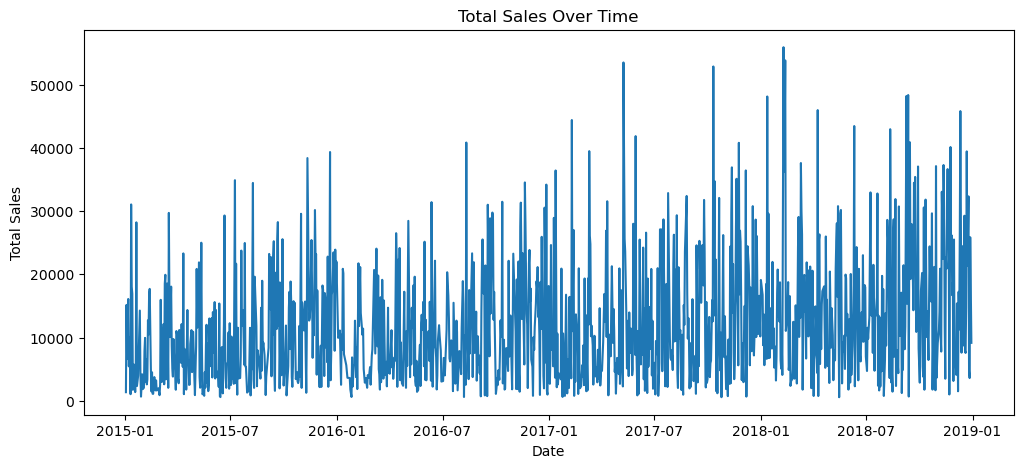

In [14]:
# Plot total sales over time
plt.figure(figsize=(12, 5))
plt.plot(df_daily['Order Date'], df_daily['Sales'])
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Total Sales Over Time")
plt.show()

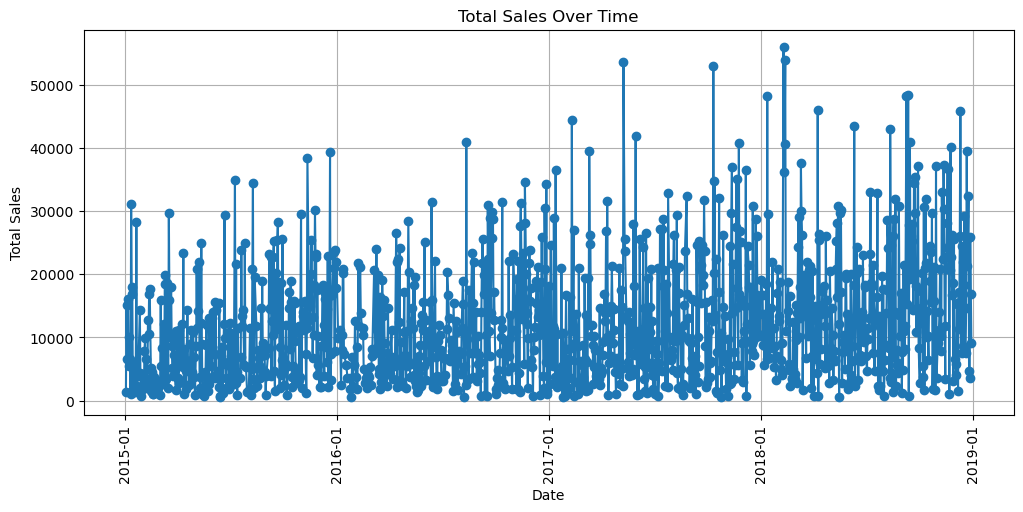

In [15]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 5))
plt.plot(df_daily['Order Date'], df_daily['Sales'], marker='o', linestyle='-')

# Format x-axis for better readability
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Show every year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as YYYY-MM
plt.xticks(rotation=90)  # Rotate for better visibility

plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Total Sales Over Time")
plt.grid(True)
plt.show()

C:\Users\Prathamesh\AppData\Local\Temp\ipykernel_23384\3848619865.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M', on='Order Date').sum()  # Aggregate sales monthly


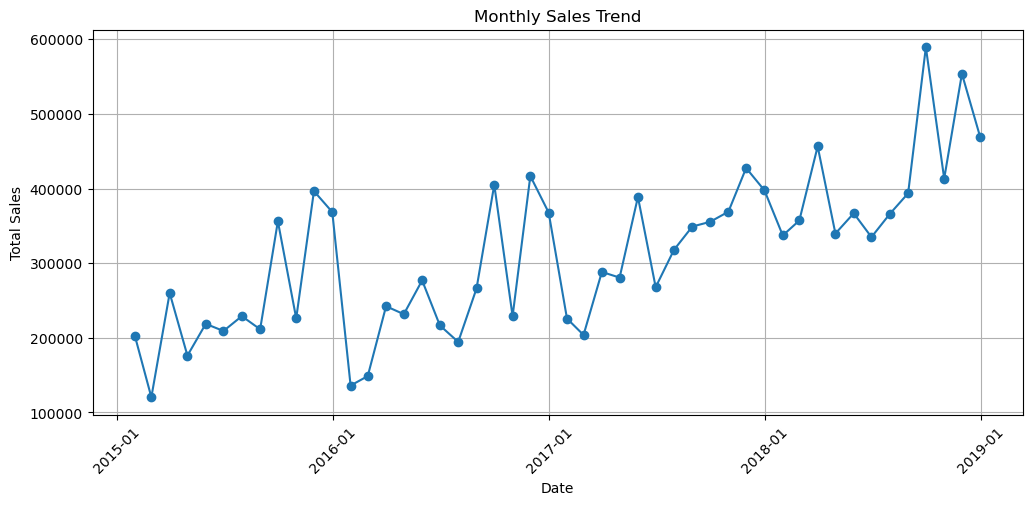

In [16]:
df_monthly = df.resample('M', on='Order Date').sum()  # Aggregate sales monthly

plt.figure(figsize=(12, 5))
plt.plot(df_monthly.index, df_monthly['Sales'], marker='o', linestyle='-')

# Improve date formatting
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Show every year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  
plt.xticks(rotation=45)

plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend")
plt.grid(True)
plt.show()

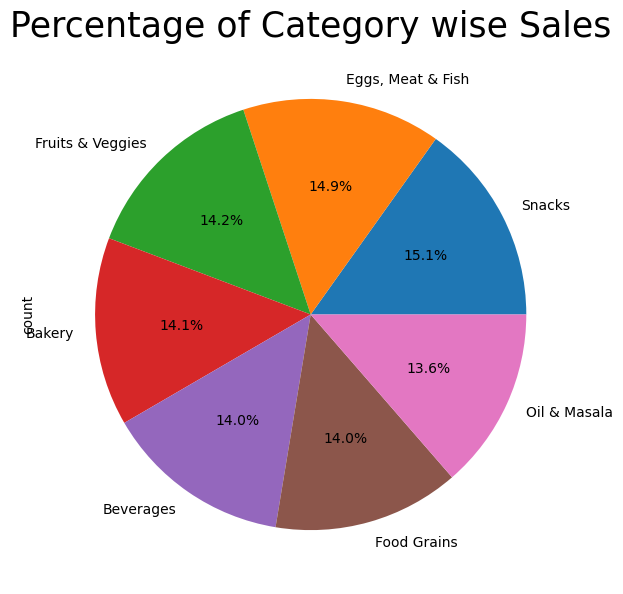

In [17]:
plt.figure(figsize=(9,7))
df['Category'].value_counts().plot.pie(autopct="%1.1f%%")      
plt.title('Percentage of Category wise Sales',fontsize=25)                         
plt.show()

In [18]:
# Upward trend suggests growing sales over time

<Figure size 1200x800 with 0 Axes>

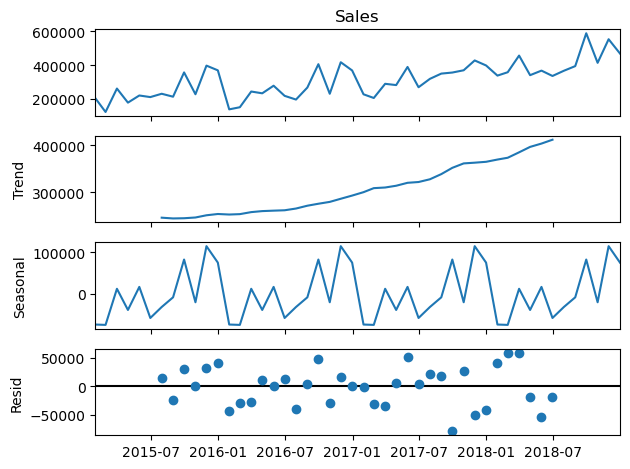

In [19]:
# STL Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series (additive model)
decomposed = seasonal_decompose(df_monthly['Sales'], model='additive', period=12)

# Plot components
plt.figure(figsize=(12, 8))
decomposed.plot()
plt.show()

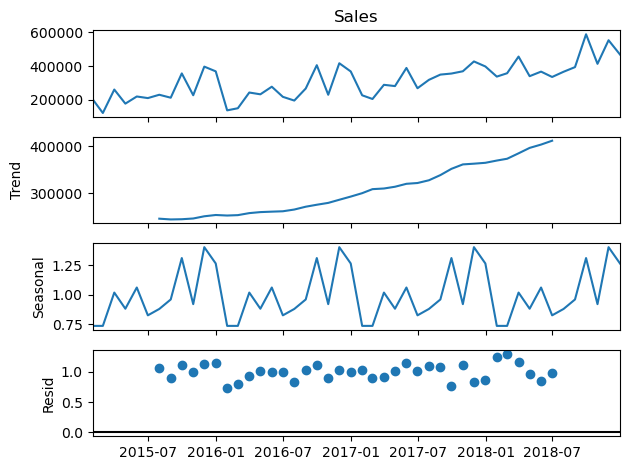

In [20]:
# (Multiplicative model)
decomposed = seasonal_decompose(df_monthly['Sales'], model='multiplicative', period=12)
decomposed.plot()
plt.show()

In [21]:
# Both seasonality look similar, that means the seasonal pattern is not strongly dependent on the trend, so using additive decomposition is fine!

In [22]:
# Performing ADF test
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(df_monthly['Sales'])

# Print results
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")
print("Critical Values:", adf_test[4])

# Null Hypothesis (HO): The time series has a unit root (non-stationary).
# Alternative Hypothesis (H1): The time series is stationary.

# Decision
if adf_test[1] < 0.05:
    print("Data is stationary (Reject H0)")
else:
    print("Data is NOT stationary (Fail to reject H0)")

ADF Statistic: 0.9471468999036932
p-value: 0.9936757677518037
Critical Values: {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}
Data is NOT stationary (Fail to reject H0)


In [23]:
# The data is NOT stationary! That means we must transform it before using models.

In [24]:
# First-order differencing
df_monthly['Sales_diff'] = df_monthly['Sales'].diff() 
df_monthly = df_monthly.dropna()

In [25]:
# Re-run ADF test
adf_test_diff = adfuller(df_monthly['Sales_diff'])

# Print results
print(f"ADF Statistic after differencing: {adf_test_diff[0]}")
print(f"p-value: {adf_test_diff[1]}")
print("Critical Values:", adf_test_diff[4])

# Decision
if adf_test_diff[1] < 0.05:
    print("Data is now stationary (Reject H0)")
else:
    print("Data is still NOT stationary")

ADF Statistic after differencing: -5.722950297184201
p-value: 6.874001165745398e-07
Critical Values: {'1%': -3.626651907578875, '5%': -2.9459512825788754, '10%': -2.6116707716049383}
Data is now stationary (Reject H0)


In [26]:
from pmdarima import auto_arima

# Auto-ARIMA to find best (p, d, q)
auto_model = auto_arima(df_monthly['Sales'], seasonal=False, trace=True, suppress_warnings=True)

# Best parameters
print(f"Best ARIMA order: {auto_model.order}")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1192.321, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1184.439, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1179.844, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1190.603, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1181.266, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1184.232, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1178.484, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1180.418, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1180.423, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1183.353, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1182.421, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.284 seconds
Best ARIMA order: (0, 1, 1)


In [27]:
from pmdarima import auto_arima

# Seasonal Auto-ARIMA (s=12 for monthly seasonality)
auto_model = auto_arima(df_monthly['Sales'], seasonal=True, m=12, trace=True, suppress_warnings=True)

# Best SARIMA order
print(f"Best SARIMA order: {auto_model.order}, Seasonal order: {auto_model.seasonal_order}")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1192.321, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1172.532, Time=0.02 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1171.958, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1190.603, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1179.844, Time=0.01 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1173.818, Time=0.04 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1171.426, Time=0.07 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=1186.315, Time=0.05 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=1172.932, Time=0.09 sec
 ARIMA(0,1,2)(0,0,2)[12] intercept   : AIC=1174.540, Time=0.07 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=1176.449, Time=0.04 sec
 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=1172.852, Time=0.19 sec
 ARIMA(0,1,1)(0,0,2)[12]     

## Model Fitting and Evaluation

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Train ARIMA Model
arima_model = SARIMAX(df_monthly['Sales'], order=(0,1,1), seasonal_order=(0,0,0,0))
arima_result = arima_model.fit()

# Train SARIMA Model
sarima_model = SARIMAX(df_monthly['Sales'], order=(0,1,1), seasonal_order=(1,0,0,12))
sarima_result = sarima_model.fit()

# Forecast Next 12 Months
future_steps = 12
arima_forecast = arima_result.get_forecast(steps=future_steps)
sarima_forecast = sarima_result.get_forecast(steps=future_steps)

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_true = df_monthly['Sales'][-12:]  # Actual sales for last 12 months
y_pred = sarima_result.predict(start=len(df_monthly)-12, end=len(df_monthly)-1)

mae = mean_absolute_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)

print(f"MAE: {mae}, RMSE: {rmse}")

MAE: 52104.528560051614, RMSE: 72742.88174498583


C:\Users\Prathamesh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [31]:
# For big data
mape = (abs(y_true - y_pred) / y_true).mean() * 100
print(f"MAPE: {mape:.2f}%")

MAPE: 11.64%


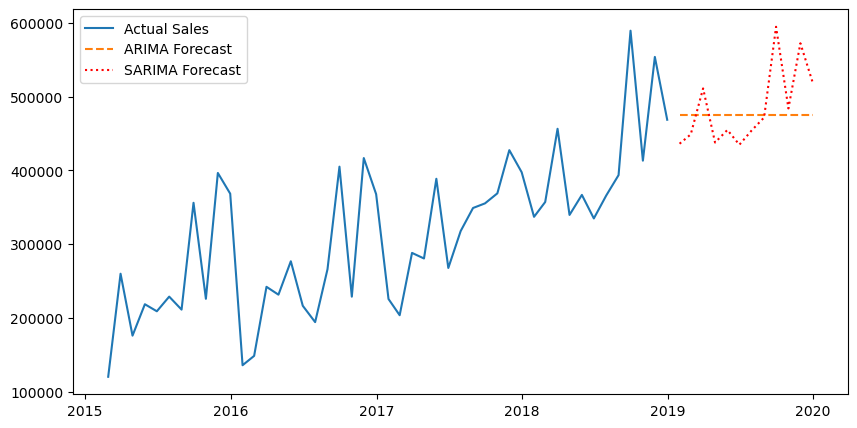

In [32]:
# Plot Forecasts
plt.figure(figsize=(10,5))
plt.plot(df_monthly.index, df_monthly['Sales'], label="Actual Sales")
plt.plot(arima_forecast.predicted_mean, label="ARIMA Forecast", linestyle="dashed")
plt.plot(sarima_forecast.predicted_mean, label="SARIMA Forecast", linestyle="dotted", color="red")
plt.legend()
plt.show()

C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


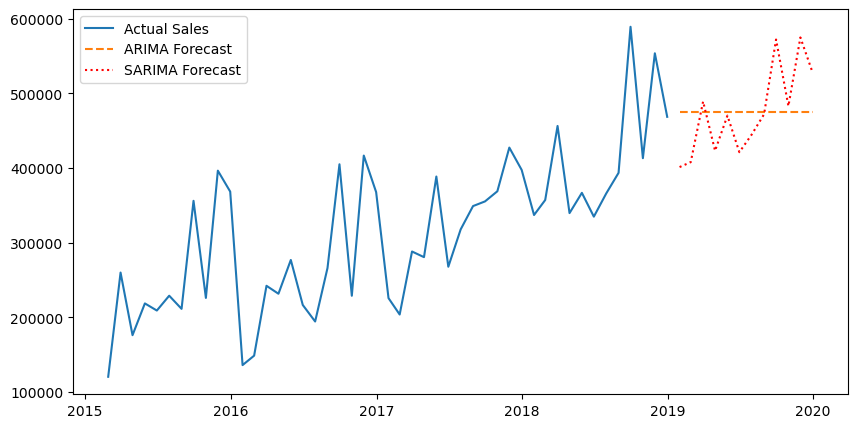

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Train ARIMA Model
arima_model = SARIMAX(df_monthly['Sales'], order=(0,1,1), seasonal_order=(0,0,0,0))
arima_result = arima_model.fit()

# Train SARIMA Model
sarima_model = SARIMAX(df_monthly['Sales'], order=(2,1,3), seasonal_order=(1,0,2,12))
sarima_result = sarima_model.fit()

# Forecast Next 12 Months
future_steps = 12
arima_forecast = arima_result.get_forecast(steps=future_steps)
sarima_forecast = sarima_result.get_forecast(steps=future_steps)

# Plot Forecasts
plt.figure(figsize=(10,5))
plt.plot(df_monthly.index, df_monthly['Sales'], label="Actual Sales")
plt.plot(arima_forecast.predicted_mean, label="ARIMA Forecast", linestyle="dashed")
plt.plot(sarima_forecast.predicted_mean, label="SARIMA Forecast", linestyle="dotted", color="red")
plt.legend()
plt.show()

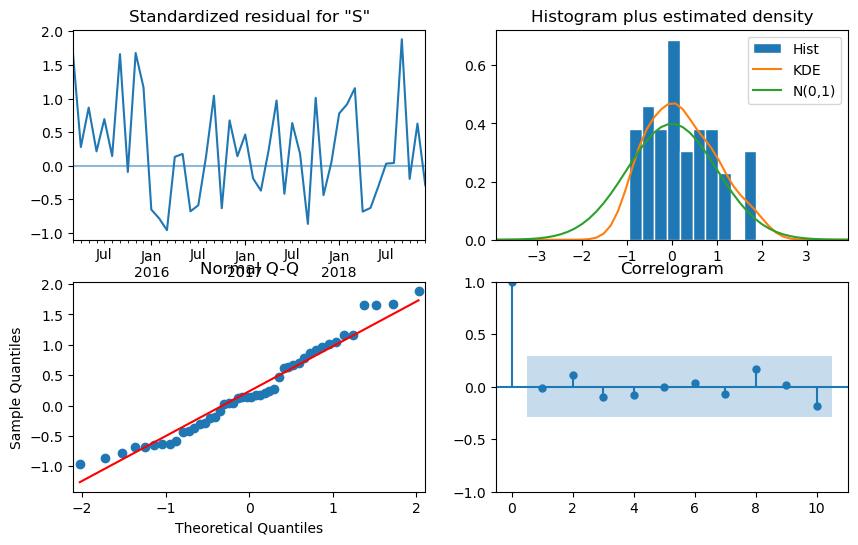

In [34]:
sarima_result.plot_diagnostics(figsize=(10,6))
plt.show()

In [35]:
df.shape

(9994, 11)

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_true = df_monthly['Sales'][-12:]  # Actual sales for last 12 months
y_pred = sarima_result.predict(start=len(df_monthly)-12, end=len(df_monthly)-1)

mae = mean_absolute_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)

print(f"MAE: {mae}, RMSE: {rmse}")

MAE: 46480.157237558684, RMSE: 59642.57426702098


C:\Users\Prathamesh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [37]:
# For big data
mape = (abs(y_true - y_pred) / y_true).mean() * 100
print(f"MAPE: {mape:.2f}%")

MAPE: 10.89%


In [38]:
# A MAPE of 10.89% means that, on average, your SARIMA model's predictions are about 10.89% off from the actual sales.
# Below 10% → Excellent
# 10-20% → Good
# 20-50% → Acceptable but could improve
# Above 50% → Poor

In [39]:
# Manual grid search over SARIMA hyperparameters.

# Here's a constrained grid search for SARIMA hyperparameters using pmdarima's SARIMAX model. This version:
#Limits the search space
# Uses AIC (Akaike Information Criterion) to find the best model
# Uses parallel processing for speed

import itertools
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

# Define the parameter grid
p = d = q = range(0, 3)  # Limited to 0, 1, 2
P = D = Q = range(0, 2)  # Seasonal params (0 or 1)
s = [12]  # Seasonal period (monthly data)

# Generate all parameter combinations
param_combinations = list(itertools.product(p, d, q, P, D, Q, s))

# Store results
best_aic = np.inf
best_params = None
best_model = None

# Train models
for params in param_combinations:
    try:
        model = SARIMAX(df_monthly["Sales"], order=params[:3], seasonal_order=params[3:])
        result = model.fit(disp=False)
        
        if result.aic < best_aic:
            best_aic = result.aic
            best_params = params
            best_model = result
        print(f"Tested {params} - AIC: {result.aic}")

    except Exception as e:
        print(f"Skipping {params} due to error: {e}")

print(f"\nBest Model: SARIMA{best_params} with AIC: {best_aic}")


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary

Tested (0, 0, 0, 0, 0, 0, 12) - AIC: 1329.9617324887158
Tested (0, 0, 0, 0, 0, 1, 12) - AIC: 1300.4480372221153
Tested (0, 0, 0, 0, 1, 0, 12) - AIC: 896.467448816577
Tested (0, 0, 0, 0, 1, 1, 12) - AIC: 905.3276418227374
Tested (0, 0, 0, 1, 0, 0, 12) - AIC: 1242.6871493448675
Tested (0, 0, 0, 1, 0, 1, 12) - AIC: 1238.417246275795
Tested (0, 0, 0, 1, 1, 0, 12) - AIC: 895.8795502138445
Tested (0, 0, 0, 1, 1, 1, 12) - AIC: 883.2663279787066
Tested (0, 0, 1, 0, 0, 0, 12) - AIC: 1306.5033584943358
Tested (0, 0, 1, 0, 0, 1, 12) - AIC: 1303.6893760586652
Tested (0, 0, 1, 0, 1, 0, 12) - AIC: 891.0493696384583
Tested (0, 0, 1, 0, 1, 1, 12) - AIC: 892.9518376006693
Tested (0, 0, 1, 1, 0, 0, 12) - AIC: 1301.559520007024
Tested (0, 0, 1, 1, 0, 1, 12) - AIC: 1303.2564909578043
Tested (0, 0, 1, 1, 1, 0, 12) - AIC: 892.9229358781542


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary

Tested (0, 0, 1, 1, 1, 1, 12) - AIC: 889.8731048740519
Tested (0, 0, 2, 0, 0, 0, 12) - AIC: 1303.0456956755809
Tested (0, 0, 2, 0, 0, 1, 12) - AIC: 1303.3959695935343
Tested (0, 0, 2, 0, 1, 0, 12) - AIC: 891.2914594643693
Tested (0, 0, 2, 0, 1, 1, 12) - AIC: 893.2914543735666
Tested (0, 0, 2, 1, 0, 0, 12) - AIC: 1302.697835090413
Tested (0, 0, 2, 1, 0, 1, 12) - AIC: 1304.4354656171797
Tested (0, 0, 2, 1, 1, 0, 12) - AIC: 893.2914536367533


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary

Tested (0, 0, 2, 1, 1, 1, 12) - AIC: 895.2914489190296
Tested (0, 1, 0, 0, 0, 0, 12) - AIC: 1190.6028944446225
Tested (0, 1, 0, 0, 0, 1, 12) - AIC: 1188.2389892779654
Tested (0, 1, 0, 0, 1, 0, 12) - AIC: 870.7039132609135
Tested (0, 1, 0, 0, 1, 1, 12) - AIC: 857.7227670851692
Tested (0, 1, 0, 1, 0, 0, 12) - AIC: 1176.3297109515474
Tested (0, 1, 0, 1, 0, 1, 12) - AIC: 1182.8962414940931
Tested (0, 1, 0, 1, 1, 0, 12) - AIC: 863.0801951341506
Tested (0, 1, 0, 1, 1, 1, 12) - AIC: 859.3426153790145
Tested (0, 1, 1, 0, 0, 0, 12) - AIC: 1178.4844629787308


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for varianc

Tested (0, 1, 1, 0, 0, 1, 12) - AIC: 1170.249379697146
Tested (0, 1, 1, 0, 1, 0, 12) - AIC: 860.3955793796636
Tested (0, 1, 1, 0, 1, 1, 12) - AIC: 848.2651826844051
Tested (0, 1, 1, 1, 0, 0, 12) - AIC: 1165.1320121899378
Tested (0, 1, 1, 1, 0, 1, 12) - AIC: 1165.8064325000682
Tested (0, 1, 1, 1, 1, 0, 12) - AIC: 854.689235354318


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Tested (0, 1, 1, 1, 1, 1, 12) - AIC: 850.2102506185724
Tested (0, 1, 2, 0, 0, 0, 12) - AIC: 1180.4226270741237
Tested (0, 1, 2, 0, 0, 1, 12) - AIC: 1172.1008781223393
Tested (0, 1, 2, 0, 1, 0, 12) - AIC: 862.2208500169581
Tested (0, 1, 2, 0, 1, 1, 12) - AIC: 850.3977304102206
Tested (0, 1, 2, 1, 0, 0, 12) - AIC: 1166.9038550165205
Tested (0, 1, 2, 1, 0, 1, 12) - AIC: 1167.4592279743308


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Tested (0, 1, 2, 1, 1, 0, 12) - AIC: 856.6707388498546
Tested (0, 1, 2, 1, 1, 1, 12) - AIC: 852.3183093701267
Tested (0, 2, 0, 0, 0, 0, 12) - AIC: 1213.4301666010783
Tested (0, 2, 0, 0, 0, 1, 12) - AIC: 1212.7423183833885
Tested (0, 2, 0, 0, 1, 0, 12) - AIC: 882.950133854525
Tested (0, 2, 0, 0, 1, 1, 12) - AIC: 869.0123074882284
Tested (0, 2, 0, 1, 0, 0, 12) - AIC: 1199.1412268007236
Tested (0, 2, 0, 1, 0, 1, 12) - AIC: 1207.3356000218346


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Usi

Tested (0, 2, 0, 1, 1, 0, 12) - AIC: 872.9154960770251
Tested (0, 2, 0, 1, 1, 1, 12) - AIC: 869.9360063587042
Tested (0, 2, 1, 0, 0, 0, 12) - AIC: 1171.2154679007544
Tested (0, 2, 1, 0, 0, 1, 12) - AIC: 1166.9385313895725
Tested (0, 2, 1, 0, 1, 0, 12) - AIC: 850.1308352354266
Tested (0, 2, 1, 0, 1, 1, 12) - AIC: 845.6003148895562
Tested (0, 2, 1, 1, 0, 0, 12) - AIC: 1164.070054948194


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting se

Tested (0, 2, 1, 1, 0, 1, 12) - AIC: 1163.842939852945
Tested (0, 2, 1, 1, 1, 0, 12) - AIC: 848.4547428145597
Tested (0, 2, 1, 1, 1, 1, 12) - AIC: 847.4485168903843
Tested (0, 2, 2, 0, 0, 0, 12) - AIC: 1162.597957964006
Tested (0, 2, 2, 0, 0, 1, 12) - AIC: 1160.723689676754


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting se

Tested (0, 2, 2, 0, 1, 0, 12) - AIC: 842.1542477932879
Tested (0, 2, 2, 0, 1, 1, 12) - AIC: 840.3409439803382
Tested (0, 2, 2, 1, 0, 0, 12) - AIC: 1159.436223949138
Tested (0, 2, 2, 1, 0, 1, 12) - AIC: 1160.668532080294


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Tested (0, 2, 2, 1, 1, 0, 12) - AIC: 842.2401158243191
Tested (0, 2, 2, 1, 1, 1, 12) - AIC: 842.3214228649774
Tested (1, 0, 0, 0, 0, 0, 12) - AIC: 1219.8827264771692
Tested (1, 0, 0, 0, 0, 1, 12) - AIC: 1213.6751279295186
Tested (1, 0, 0, 0, 1, 0, 12) - AIC: 886.143280825116


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Tested (1, 0, 0, 0, 1, 1, 12) - AIC: 882.2041123409966
Tested (1, 0, 0, 1, 0, 0, 12) - AIC: 1208.6368528810394
Tested (1, 0, 0, 1, 0, 1, 12) - AIC: 1207.7126462334093
Tested (1, 0, 0, 1, 1, 0, 12) - AIC: 886.0926065151755


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Tested (1, 0, 0, 1, 1, 1, 12) - AIC: 883.7473738228225
Tested (1, 0, 1, 0, 0, 0, 12) - AIC: 1205.2694209751112
Tested (1, 0, 1, 0, 0, 1, 12) - AIC: 1198.3688774520813
Tested (1, 0, 1, 0, 1, 0, 12) - AIC: 886.3695747425977
Tested (1, 0, 1, 0, 1, 1, 12) - AIC: 880.3254656605601
Tested (1, 0, 1, 1, 0, 0, 12) - AIC: 1194.1962077506246


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

Tested (1, 0, 1, 1, 0, 1, 12) - AIC: 1194.8765878944228
Tested (1, 0, 1, 1, 1, 0, 12) - AIC: 871.4164787534863


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Tested (1, 0, 1, 1, 1, 1, 12) - AIC: 881.833317916498
Tested (1, 0, 2, 0, 0, 0, 12) - AIC: 1207.2053756175426
Tested (1, 0, 2, 0, 0, 1, 12) - AIC: 1200.062154702614


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

Tested (1, 0, 2, 0, 1, 0, 12) - AIC: 878.9950620198714
Tested (1, 0, 2, 0, 1, 1, 12) - AIC: 872.3318792320106
Tested (1, 0, 2, 1, 0, 0, 12) - AIC: 1195.7685330185723
Tested (1, 0, 2, 1, 0, 1, 12) - AIC: 1196.3955353071012


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Tested (1, 0, 2, 1, 1, 0, 12) - AIC: 874.98815450456


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Tested (1, 0, 2, 1, 1, 1, 12) - AIC: 874.0362148272683
Tested (1, 1, 0, 0, 0, 0, 12) - AIC: 1183.3527720241675
Tested (1, 1, 0, 0, 0, 1, 12) - AIC: 1174.8191646453236
Tested (1, 1, 0, 0, 1, 0, 12) - AIC: 861.4643410454416
Tested (1, 1, 0, 0, 1, 1, 12) - AIC: 850.9537645336685
Tested (1, 1, 0, 1, 0, 0, 12) - AIC: 1170.634322997232
Tested (1, 1, 0, 1, 0, 1, 12) - AIC: 1170.984852907073
Tested (1, 1, 0, 1, 1, 0, 12) - AIC: 857.9850363647647


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for varianc

Tested (1, 1, 0, 1, 1, 1, 12) - AIC: 852.953480219787
Tested (1, 1, 1, 0, 0, 0, 12) - AIC: 1180.4182000746498
Tested (1, 1, 1, 0, 0, 1, 12) - AIC: 1172.2334804949346
Tested (1, 1, 1, 0, 1, 0, 12) - AIC: 862.1613704633063
Tested (1, 1, 1, 0, 1, 1, 12) - AIC: 850.0843899736961
Tested (1, 1, 1, 1, 0, 0, 12) - AIC: 1167.1115252594068
Tested (1, 1, 1, 1, 0, 1, 12) - AIC: 1167.6963498587754


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Tested (1, 1, 1, 1, 1, 0, 12) - AIC: 856.497396651512
Tested (1, 1, 1, 1, 1, 1, 12) - AIC: 851.976002050063
Tested (1, 1, 2, 0, 0, 0, 12) - AIC: 1182.4213230105013
Tested (1, 1, 2, 0, 0, 1, 12) - AIC: 1174.086867386137
Tested (1, 1, 2, 0, 1, 0, 12) - AIC: 864.3409335547465


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Tested (1, 1, 2, 0, 1, 1, 12) - AIC: 851.1370980054774
Tested (1, 1, 2, 1, 0, 0, 12) - AIC: 1168.8361865463744
Tested (1, 1, 2, 1, 0, 1, 12) - AIC: 1169.368440620174


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Tested (1, 1, 2, 1, 1, 0, 12) - AIC: 857.7059167302093
Tested (1, 1, 2, 1, 1, 1, 12) - AIC: 853.0977375646587
Tested (1, 2, 0, 0, 0, 0, 12) - AIC: 1189.7616606795564
Tested (1, 2, 0, 0, 0, 1, 12) - AIC: 1182.129322744291
Tested (1, 2, 0, 0, 1, 0, 12) - AIC: 864.2633818122738
Tested (1, 2, 0, 0, 1, 1, 12) - AIC: 852.5665287894375
Tested (1, 2, 0, 1, 0, 0, 12) - AIC: 1178.6922866271364


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for varianc

Tested (1, 2, 0, 1, 0, 1, 12) - AIC: 1178.6430139255406
Tested (1, 2, 0, 1, 1, 0, 12) - AIC: 859.6697476953078
Tested (1, 2, 0, 1, 1, 1, 12) - AIC: 854.323791658833
Tested (1, 2, 1, 0, 0, 0, 12) - AIC: 1164.4196679756303
Tested (1, 2, 1, 0, 0, 1, 12) - AIC: 1160.8116117667307


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Tested (1, 2, 1, 0, 1, 0, 12) - AIC: 842.5465297968932
Tested (1, 2, 1, 0, 1, 1, 12) - AIC: 839.6845785517787
Tested (1, 2, 1, 1, 0, 0, 12) - AIC: 1159.1189041971613
Tested (1, 2, 1, 1, 0, 1, 12) - AIC: 1160.0981058523967
Tested (1, 2, 1, 1, 1, 0, 12) - AIC: 842.6854516901476
Tested (1, 2, 1, 1, 1, 1, 12) - AIC: 841.6437665504985
Tested (1, 2, 2, 0, 0, 0, 12) - AIC: 1166.9486032860843
Tested (1, 2, 2, 0, 0, 1, 12) - AIC: 1159.6437063070161


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting se

Tested (1, 2, 2, 0, 1, 0, 12) - AIC: 840.2339327084812
Tested (1, 2, 2, 0, 1, 1, 12) - AIC: 837.818511988706
Tested (1, 2, 2, 1, 0, 0, 12) - AIC: 1158.0317713799936


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA par

Tested (1, 2, 2, 1, 0, 1, 12) - AIC: 1158.9101984710373
Tested (1, 2, 2, 1, 1, 0, 12) - AIC: 840.2460645184631


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Tested (1, 2, 2, 1, 1, 1, 12) - AIC: 839.766578097229
Tested (2, 0, 0, 0, 0, 0, 12) - AIC: 1210.6248808441626
Tested (2, 0, 0, 0, 0, 1, 12) - AIC: 1203.2209832296699
Tested (2, 0, 0, 0, 1, 0, 12) - AIC: 886.5388769344465
Tested (2, 0, 0, 0, 1, 1, 12) - AIC: 881.4591735407147
Tested (2, 0, 0, 1, 0, 0, 12) - AIC: 1198.7428006864457
Tested (2, 0, 0, 1, 0, 1, 12) - AIC: 1198.8040426716461


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('

Tested (2, 0, 0, 1, 1, 0, 12) - AIC: 885.762436191315
Tested (2, 0, 0, 1, 1, 1, 12) - AIC: 883.1154379211131
Tested (2, 0, 1, 0, 0, 0, 12) - AIC: 1207.2642217854263
Tested (2, 0, 1, 0, 0, 1, 12) - AIC: 1200.3603072936708


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.


Tested (2, 0, 1, 0, 1, 0, 12) - AIC: 878.0001058424237
Tested (2, 0, 1, 0, 1, 1, 12) - AIC: 870.2800464860877
Tested (2, 0, 1, 1, 0, 0, 12) - AIC: 1196.1885784129222
Tested (2, 0, 1, 1, 0, 1, 12) - AIC: 1196.8503484736127


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Prat

Tested (2, 0, 1, 1, 1, 0, 12) - AIC: 873.3168038063496
Tested (2, 0, 1, 1, 1, 1, 12) - AIC: 872.0127869679527
Tested (2, 0, 2, 0, 0, 0, 12) - AIC: 1205.1395947456613
Tested (2, 0, 2, 0, 0, 1, 12) - AIC: 1198.6094379753733


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\P

Tested (2, 0, 2, 0, 1, 0, 12) - AIC: 879.9724332598718


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\Prathamesh\anaconda3\

Tested (2, 0, 2, 0, 1, 1, 12) - AIC: 872.2432958334126
Tested (2, 0, 2, 1, 0, 0, 12) - AIC: 1194.6846544118137
Tested (2, 0, 2, 1, 0, 1, 12) - AIC: 1195.0107712145427


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tested (2, 0, 2, 1, 1, 0, 12) - AIC: 875.4269851487553


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood o

Tested (2, 0, 2, 1, 1, 1, 12) - AIC: 874.0277002782163
Tested (2, 1, 0, 0, 0, 0, 12) - AIC: 1182.2828585685384
Tested (2, 1, 0, 0, 0, 1, 12) - AIC: 1173.5982704635753
Tested (2, 1, 0, 0, 1, 0, 12) - AIC: 862.5707335703914
Tested (2, 1, 0, 0, 1, 1, 12) - AIC: 850.297299948506
Tested (2, 1, 0, 1, 0, 0, 12) - AIC: 1168.9008171652422
Tested (2, 1, 0, 1, 0, 1, 12) - AIC: 1169.477947297649
Tested (2, 1, 0, 1, 1, 0, 12) - AIC: 857.7125787379912
Tested (2, 1, 0, 1, 1, 1, 12) - AIC: 852.2972789061562
Tested (2, 1, 1, 0, 0, 0, 12) - AIC: 1182.417806874456
Tested (2, 1, 1, 0, 0, 1, 12) - AIC: 1174.2120150443739


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Tested (2, 1, 1, 0, 1, 0, 12) - AIC: 862.3503856946488
Tested (2, 1, 1, 0, 1, 1, 12) - AIC: 851.2165169194058
Tested (2, 1, 1, 1, 0, 0, 12) - AIC: 1169.1065084159093


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Tested (2, 1, 1, 1, 0, 1, 12) - AIC: 1169.6653981553384
Tested (2, 1, 1, 1, 1, 0, 12) - AIC: 857.8889258571115


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Tested (2, 1, 1, 1, 1, 1, 12) - AIC: 853.1803892073398
Tested (2, 1, 2, 0, 0, 0, 12) - AIC: 1184.4243730375047
Tested (2, 1, 2, 0, 0, 1, 12) - AIC: 1176.0490268083136
Tested (2, 1, 2, 0, 1, 0, 12) - AIC: 861.6375989382864


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Tested (2, 1, 2, 0, 1, 1, 12) - AIC: 852.4193175946192
Tested (2, 1, 2, 1, 0, 0, 12) - AIC: 1170.823417198445


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Tested (2, 1, 2, 1, 0, 1, 12) - AIC: 1171.3625873739522
Tested (2, 1, 2, 1, 1, 0, 12) - AIC: 859.6622026097781


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Tested (2, 1, 2, 1, 1, 1, 12) - AIC: 854.3856554053191
Tested (2, 2, 0, 0, 0, 0, 12) - AIC: 1179.0809774956547
Tested (2, 2, 0, 0, 0, 1, 12) - AIC: 1171.7002500447982
Tested (2, 2, 0, 0, 1, 0, 12) - AIC: 858.3286025055629
Tested (2, 2, 0, 0, 1, 1, 12) - AIC: 845.4422388755197
Tested (2, 2, 0, 1, 0, 0, 12) - AIC: 1168.8316790952222
Tested (2, 2, 0, 1, 0, 1, 12) - AIC: 1169.03365304511


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Tested (2, 2, 0, 1, 1, 0, 12) - AIC: 853.1971425597148
Tested (2, 2, 0, 1, 1, 1, 12) - AIC: 847.3261661791803
Tested (2, 2, 1, 0, 0, 0, 12) - AIC: 1164.8078350512799
Tested (2, 2, 1, 0, 0, 1, 12) - AIC: 1161.9351775588632
Tested (2, 2, 1, 0, 1, 0, 12) - AIC: 839.550567250961


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Tested (2, 2, 1, 0, 1, 1, 12) - AIC: 837.6256601348947
Tested (2, 2, 1, 1, 0, 0, 12) - AIC: 1160.4279076291177
Tested (2, 2, 1, 1, 0, 1, 12) - AIC: 1161.4473738604506


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Tested (2, 2, 1, 1, 1, 0, 12) - AIC: 840.0320391984544
Tested (2, 2, 1, 1, 1, 1, 12) - AIC: 839.4257089893891
Tested (2, 2, 2, 0, 0, 0, 12) - AIC: 1162.1541331024487


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('N

Tested (2, 2, 2, 0, 0, 1, 12) - AIC: 1158.7645482167566
Tested (2, 2, 2, 0, 1, 0, 12) - AIC: 839.9731578612501
Tested (2, 2, 2, 0, 1, 1, 12) - AIC: 835.4880395924469


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tested (2, 2, 2, 1, 0, 0, 12) - AIC: 1156.8172554658088
Tested (2, 2, 2, 1, 0, 1, 12) - AIC: 1157.1740431795988


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Tested (2, 2, 2, 1, 1, 0, 12) - AIC: 840.5688521266987


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Tested (2, 2, 2, 1, 1, 1, 12) - AIC: 837.4375198203003

Best Model: SARIMA(2, 2, 2, 0, 1, 1, 12) with AIC: 835.4880395924469


C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


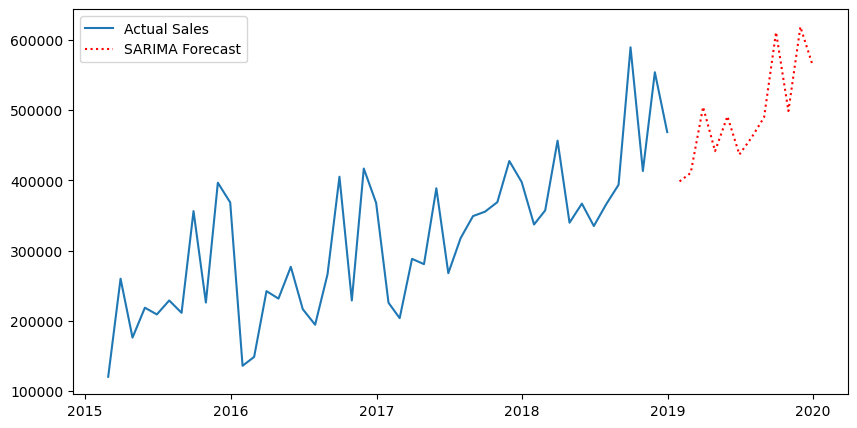

In [40]:
# Train SARIMA Model
sarima_model = SARIMAX(df_monthly['Sales'], order=(2,2,2), seasonal_order=(0,1,1,12))
sarima_result = sarima_model.fit()

# Forecast Next 12 Months
future_steps = 12
sarima_forecast = sarima_result.get_forecast(steps=future_steps)

# Plot Forecasts
plt.figure(figsize=(10,5))
plt.plot(df_monthly.index, df_monthly['Sales'], label="Actual Sales")
plt.plot(sarima_forecast.predicted_mean, label="SARIMA Forecast", linestyle="dotted", color="red")
plt.legend()
plt.show()

In [41]:
y_true = df_monthly['Sales'][-12:]  # Last 12 months actual sales
y_pred = best_model.predict(start=len(df_monthly)-12, end=len(df_monthly)-1)

# Evaluate performance
mae = mean_absolute_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error

print(f"MAE: {mae}, RMSE: {rmse}, MAPE: {mape:.2f}%")

MAE: 45325.48751336455, RMSE: 58957.79097688763, MAPE: 10.96%


C:\Users\Prathamesh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


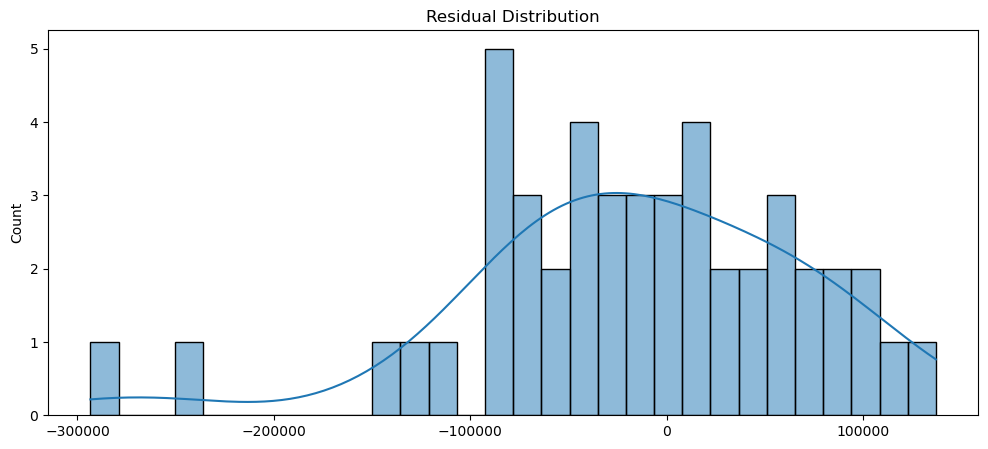

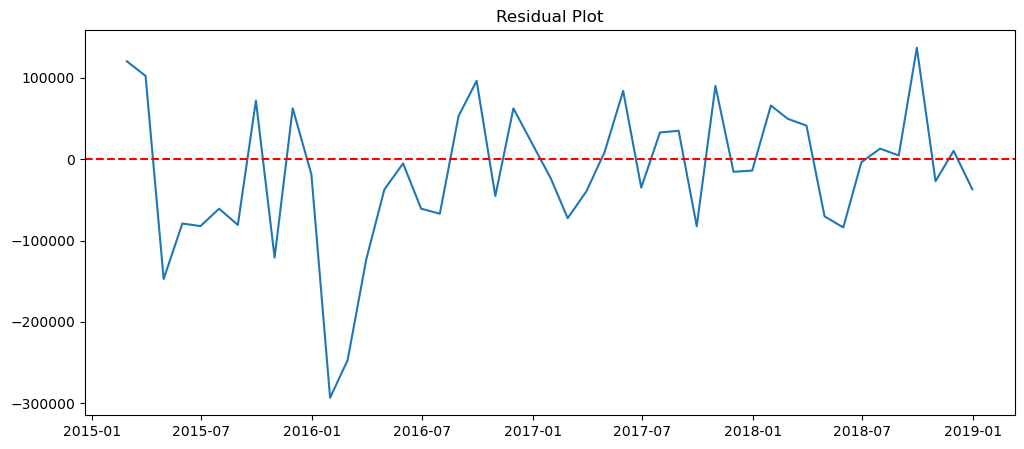

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = best_model.resid

plt.figure(figsize=(12, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residual Distribution")
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='red')
plt.title("Residual Plot")
plt.show()

In [43]:
old_sarima_model = SARIMAX(df_monthly['Sales'], order=(2,1,3), seasonal_order=(1,0,2,12))
old_sarima_result = old_sarima_model.fit()
old_sarima_pred = old_sarima_result.predict(start=len(df_monthly)-12, end=len(df_monthly)-1)

C:\Users\Prathamesh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


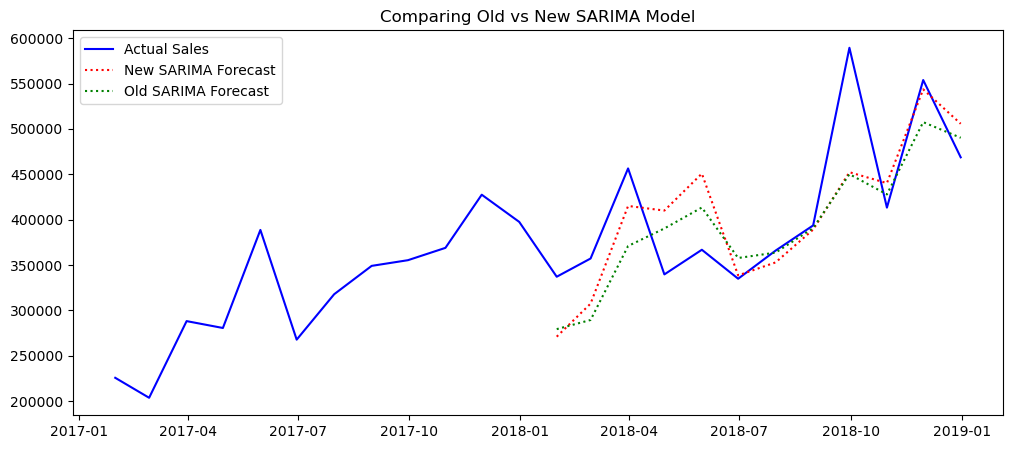

In [44]:
plt.figure(figsize=(12, 5))
plt.plot(df_monthly.index[-24:], df_monthly["Sales"][-24:], label="Actual Sales", color="blue")
plt.plot(df_monthly.index[-12:], y_pred, label="New SARIMA Forecast", linestyle="dotted", color="red")
plt.plot(df_monthly.index[-12:], old_sarima_pred, label="Old SARIMA Forecast", linestyle="dotted", color="green")
plt.legend()
plt.title("Comparing Old vs New SARIMA Model")
plt.show()

In [45]:
old_mae = mean_absolute_error(y_true, old_sarima_pred)
old_rmse = mean_squared_error(y_true, old_sarima_pred, squared=False)
old_mape = np.mean(np.abs((y_true - old_sarima_pred) / y_true)) * 100

print(f"Old SARIMA -> MAE: {old_mae}, RMSE: {old_rmse}, MAPE: {old_mape}%")
print(f"New SARIMA -> MAE: {mae}, RMSE: {rmse}, MAPE: {mape}%")

Old SARIMA -> MAE: 46480.157237558684, RMSE: 59642.57426702098, MAPE: 10.888906864096631%
New SARIMA -> MAE: 45325.48751336455, RMSE: 58957.79097688763, MAPE: 10.956063781764378%


C:\Users\Prathamesh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [46]:
# Graph, MAE and RMSE show that new SARIMA is better

In [47]:
df

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-08-11,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-08-11,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-12-06,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-11-10,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-11-10,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,2015-12-24,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,2015-12-07,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,2017-06-06,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,2018-10-16,West,1659,0.15,597.24,Tamil Nadu


In [48]:
# Applying External Regressors to SARIMA (discount)
# Independent of the target variable but correlated with it
# Available at prediction time (Profit is calculated after sales happen, so it’s not useful for forecasting)

In [49]:
# Applying LSTM (Long Short-Term Memory)
# It is a special type of Recurrent Neural Network (RNN) designed to handle sequential data and long-term dependencies. It is widely used in time series forecasting, speech recognition, stock market prediction, and more.

In [50]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [51]:
# Normalize the sales data
scaler = MinMaxScaler(feature_range=(0, 1))
df_monthly['Sales_Scaled'] = scaler.fit_transform(df_monthly[['Sales']])

In [52]:
# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

In [53]:
# Define sequence length
seq_length = 12  # 12 months for seasonality

In [54]:
# Prepare data
sales_data = df_monthly['Sales_Scaled'].values
X, y = create_sequences(sales_data, seq_length)

In [55]:
# Split into train and test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [56]:
# Reshape for LSTM input (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [57]:
# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

C:\Users\Prathamesh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [58]:
model.compile(optimizer='adam', loss='mse')

In [59]:
# Predictions
y_pred = model.predict(X_test)

# Convert predictions back to original scale
y_pred_actual = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


In [60]:
# Evaluate Model
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test_actual, y_pred_actual)
rmse = mean_squared_error(y_test_actual, y_pred_actual, squared=False)

print(f"MAE: {mae}, RMSE: {rmse}")

MAE: 323979.53571428574, RMSE: 335922.73602005513


C:\Users\Prathamesh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [62]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load your dataset (assuming df_monthly has 'Sales' column)
data = df_monthly[['Sales']].values

# Normalize data (LSTM performs better with scaled data)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length
seq_length = 12  # Using last 12 months to predict next month
X, y = create_sequences(data_scaled, seq_length)

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

# Make predictions
y_pred_scaled = model.predict(X_test)

# Convert predictions back to original scale
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_actual = scaler.inverse_transform(y_test)

# Evaluate the model
mae = mean_absolute_error(y_test_actual, y_pred)
rmse = mean_squared_error(y_test_actual, y_pred, squared=False)
mape = np.mean(np.abs((y_test_actual - y_pred) / y_test_actual)) * 100

print(f"MAE: {mae}, RMSE: {rmse}, MAPE: {mape}%")

Epoch 1/50


C:\Users\Prathamesh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1872
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1749
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1672
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1603
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1405
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1301
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1171
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0953
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0854
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0675
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0456
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0335
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0195
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0242
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0279
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/

C:\Users\Prathamesh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [63]:
#!pip install keras-tuner

In [64]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prepare data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_monthly[['Sales']])

X, y = [], []
sequence_length = 12
for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled[i:i+sequence_length])
    y.append(data_scaled[i+sequence_length])
X, y = np.array(X), np.array(y)

# Train-test split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build LSTM model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(1)
])

# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='mse')

# Train model
history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Make predictions
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# Calculate metrics
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = mean_squared_error(y_test_inv, y_pred_inv, squared=False)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

print(f"MAE: {mae}, RMSE: {rmse}, MAPE: {mape}%")

Epoch 1/200


C:\Users\Prathamesh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 247ms/step - loss: 0.2296 - val_loss: 0.5033
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1836 - val_loss: 0.3986
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1411 - val_loss: 0.3055
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0960 - val_loss: 0.2207
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0704 - val_loss: 0.1436
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0449 - val_loss: 0.0802
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0291 - val_loss: 0.0406
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0237 - val_loss: 0.0319
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0336 - val_loss: 0.0348
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0379 - val_loss: 0.0327
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0268 - val_loss: 0.0328
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0237 - val_loss: 0.0395


C:\Users\Prathamesh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [65]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras_tuner as kt  # Ensure keras_tuner is installed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Assuming df_monthly is already preprocessed and has a datetime index
data = df_monthly[['Sales']]  # Using 'Sales' as target variable

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Creating sequences for LSTM
def create_sequences(data, seq_length=12):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Set sequence length
seq_length = 12
X, y = create_sequences(data_scaled, seq_length)

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

# Function to build LSTM model
def build_lstm_model(hp):
    model = Sequential()
    model.add(LSTM(
        units=hp.Int('units', min_value=32, max_value=128, step=32), 
        return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])
    ))
    model.add(LSTM(
        units=hp.Int('units2', min_value=32, max_value=128, step=32)
    ))
    model.add(Dense(1))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])
        ),
        loss='mse',
        metrics=['mae']
    )
    return model

# Define tuner
tuner = kt.RandomSearch(
    build_lstm_model,
    objective='val_mae',  # Minimize validation MAE
    max_trials=10,  # Number of different hyperparameter combinations to try
    executions_per_trial=1,
    directory='hyperparam_tuning',
    project_name='demand_forecasting'
)

# Run hyperparameter search
tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=32)

# Get the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best Units: {best_hps.get('units')}, Best Learning Rate: {best_hps.get('learning_rate')}")

# Train the best model
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=32)

# Predictions
y_pred = best_model.predict(X_val)
y_pred = scaler.inverse_transform(y_pred)
y_val = scaler.inverse_transform(y_val)

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100

print(f"MAE: {mae}, RMSE: {rmse}, MAPE: {mape}%")

Trial 10 Complete [00h 00m 06s]
val_mae: 0.1431802660226822

Best val_mae So Far: 0.1427840143442154
Total elapsed time: 00h 01m 02s
Best Units: 128, Best Learning Rate: 0.0001
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1608 - mae: 0.3658 - val_loss: 0.4139 - val_mae: 0.6153
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.1541 - mae: 0.3568 - val_loss: 0.3981 - val_mae: 0.6024
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.1475 - mae: 0.3478 - val_loss: 0.3825 - val_mae: 0.5894
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1411 - mae: 0.3388 - val_loss: 0.3672 - val_mae: 0.5763
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.1347 - mae: 0.3298 - val_loss: 0.3520 - val_mae: 0.5631
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.1284 - mae: 0.3211 - val_loss: 0.3369 - val_mae: 0.5496
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.1223 - mae: 0.3123 - val_loss: 0.3221 - val_mae: 0.5360
Epoch 8/100
1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


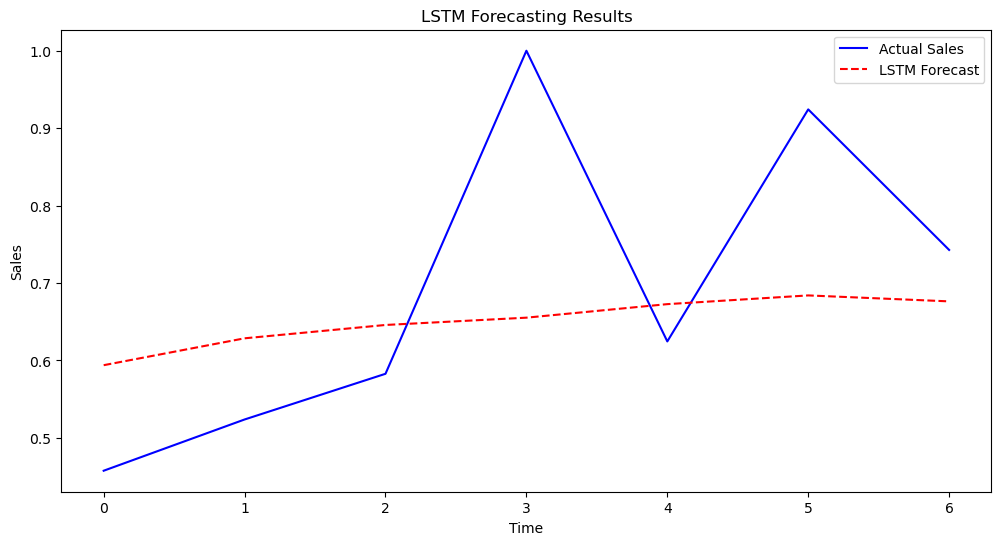

In [66]:
# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

# Prepare test data for forecasting
X_test_lstm = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

# Predict future sales
y_pred_lstm = model.predict(X_test_lstm)

# Convert predictions back to original scale if needed
# (Use inverse_transform if you applied MinMaxScaler or StandardScaler)
# y_pred_lstm = scaler.inverse_transform(y_pred_lstm)

# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_val, label="Actual Sales", color="blue")
plt.plot(y_pred_lstm, label="LSTM Forecast", color="red", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.title("LSTM Forecasting Results")
plt.legend()
plt.show()

C:\Users\Prathamesh\AppData\Local\Temp\ipykernel_23384\449784036.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=df_monthly.index[-1], periods=future_steps+1, freq='M')[1:]


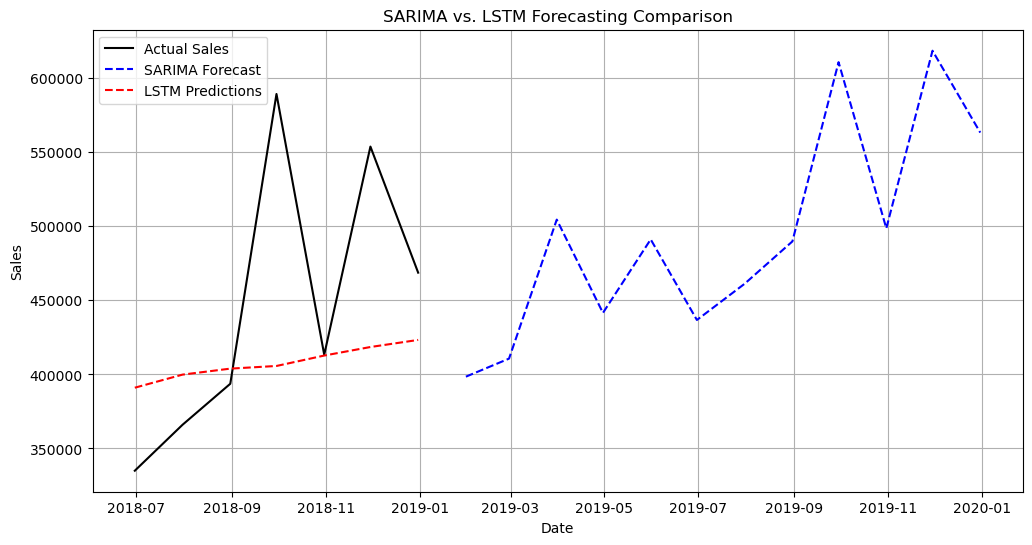

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Get SARIMA forecast values
sarima_forecast_values = sarima_forecast.predicted_mean

# Get actual last known values from dataset
actual_values = df_monthly['Sales'].iloc[-len(y_val):].values

# Prepare LSTM predictions (already inverse transformed)
lstm_predictions = y_pred.flatten()

# Generate time index for forecasts
future_dates = pd.date_range(start=df_monthly.index[-1], periods=future_steps+1, freq='M')[1:]

# Plot actual values
plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index[-len(y_val):], actual_values, label='Actual Sales', color='black')

# Plot SARIMA forecast
plt.plot(future_dates, sarima_forecast_values, label='SARIMA Forecast', color='blue', linestyle='dashed')

# Plot LSTM predictions
plt.plot(df_monthly.index[-len(y_val):], lstm_predictions, label='LSTM Predictions', color='red', linestyle='dashed')

# Labels and title
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('SARIMA vs. LSTM Forecasting Comparison')
plt.legend()
plt.grid()
plt.show()

# Conclusion

### In this project, we performed demand forecasting for a retail store using various time series models and evaluated their performance based on Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and Mean Absolute Percentage Error (MAPE).

### Models Tried:
### 1. Auto-ARIMA
### Initially used Auto-ARIMA to find an optimal SARIMA configuration.
### Provided a baseline model but required further fine-tuning.

### 2. SARIMA (Tuned Model)
### Hyperparameter tuning was performed using Grid Search.
### Best-performing model: SARIMA(2,2,2,0,1,1,12)
### Final Performance:
### MAE: 45325.48751336455
### RMSE: 58957.79097688763
### MAPE: 10.956063781764378%

### 3. LSTM (Deep Learning Approach)
### Implemented a deep learning-based LSTM model to capture sequential dependencies.
### Performed hyperparameter tuning using Keras Tuner.
### However, the LSTM model did not outperform SARIMA in terms of error metrics.


### Final Decision:
### After comparing all models, SARIMA(2,2,2,0,1,1,12) was selected as the final model, as it provided the most reliable and accurate demand forecasts. LSTM, despite being a powerful deep learning model, struggled with limited data and resulted in higher error rates.

### This study highlights that traditional statistical models like SARIMA can still outperform deep learning models for time series forecasting when data is limited.

In [68]:
import pickle

# Save the SARIMA model
with open("sarima_model.pkl", "wb") as f:
    pickle.dump(sarima_model, f)

In [69]:
# Load the model
with open("sarima_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)